# 1. Import libraries

In [41]:
#standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#EDA
import math

#OLS analysis
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
from scipy.stats import chi2_contingency

# 2. Plot colors and settings

In [63]:
#color palettes: [grey, blue, orange, green, pink, brown, purple, yellow, red]
light = ['#8c8c8c', '#88bde6', '#fbb258', '#90cd97', '#f6aac8', '#bfa454', '#bc99c7', '#eddd46', '#f07d6e']
medium = ['#4d4d4d', '#5da6da', '#faa43a', '#60bd68', '#f17cb1', '#b2912f', '#b276b2', '#dece3f', '#f15954']
dark_bright = ['#000000', '#265dab', '#df5c24', '#059749', '#e5126d', '#9d732a', '#7a3a96', '#c7b52e', '#cb2026']
#light grey grid
grid = ['#e0e0e0']

#plotting parameters
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

# 3. Load data for EDA

In [43]:
#CSVs from data_cleaning.py
df_1 = pd.read_csv('data_cleaning/df_title_loc_comp_salary.csv')
df_2 = pd.read_csv('data_cleaning/df_qualifications.csv')
df_3 = pd.read_csv('data_cleaning/df_benefits.csv')

In [44]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1287 non-null   int64  
 1   Title       1287 non-null   object 
 2   Company     1285 non-null   object 
 3   Location    1116 non-null   object 
 4   Salary      1209 non-null   float64
 5   Levels      1287 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 60.5+ KB


In [45]:
df_1.head()

,Unnamed: 0,Title,Company,Location,Salary,Levels
0,0,Data Scientist,Numerdox,"Sacramento, CA",110000.0,Jr.
1,1,Data Analyst,Cepheid,"Lodi, CA",120000.0,Unknown
2,2,Data Scientist,Cepheid,"Sunnyvale, CA",150000.0,Staff
3,3,Data Scientist,Verana Health,"San Francisco, CA",150000.0,Unknown
4,4,Data Scientist,Tinder,"San Francisco, CA",130000.0,Jr.


In [46]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Columns: 363 entries, Unnamed: 0 to Editing
dtypes: float64(362), int64(1)
memory usage: 3.6 MB


In [47]:
df_2.head()

,Unnamed: 0,Analysis skills,Communication skills,Research,R,Machine learning,Bachelor's degree,Master's degree,Doctoral degree,Doctor of Philosophy,...,Spectroscopy,SoC,GLP,CGMP,Bootstrap,Lending,Grant writing,Pass polygraph test,Pivot tables,Editing
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           1287 non-null   int64  
 1   Health insurance                     558 non-null    float64
 2   Paid time off                        558 non-null    float64
 3   Commuter assistance                  558 non-null    float64
 4   Employee stock purchase plan         558 non-null    float64
 5   401(k) matching                      558 non-null    float64
 6   401(k)                               558 non-null    float64
 7   Dental insurance                     558 non-null    float64
 8   Employee assistance program          558 non-null    float64
 9   Unlimited paid time off              558 non-null    float64
 10  Work from home                       558 non-null    float64
 11  Flexible schedule             

In [49]:
df_3.head()

,Unnamed: 0,Health insurance,Paid time off,Commuter assistance,Employee stock purchase plan,401(k) matching,401(k),Dental insurance,Employee assistance program,Unlimited paid time off,...,Cell phone reimbursement,On-site gym,Bereavement leave,Relocation assistance,Family leave,Free parking,Meals & incidentals stipend,Employee stock ownership plan,Free massages,Green card sponsorship
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 4. Data cleaning

In [50]:
df_1 = df_1.drop('Unnamed: 0', axis=1)
df_2 = df_2.drop('Unnamed: 0', axis=1)
df_3 = df_3.drop('Unnamed: 0', axis=1)

In [51]:
for i in df_2.columns:
    df_2.loc[:,i] = df_2.loc[:,i].astype('Int64')
    
for i in df_3.columns:
    df_3.loc[:,i] = df_3.loc[:,i].astype('Int64')

# 5. EDA

In [52]:
pd.pivot_table(df_1, 'Salary', index=['Title'], columns=['Levels'])

Levels,Distinguished,Jr.,Lead,Principal,Sr.,Staff,Unknown
Title,,,,,,,
Applied Scientist,NaN,NaN,NaN,130000.000000,157142.857143,156666.666667,146666.666667
Data Analyst,NaN,82666.666667,150000.000000,96000.000000,132699.250000,130000.000000,95044.444444
Data Architect,190000.0,NaN,NaN,NaN,170000.000000,NaN,200000.000000
Data Engineer,NaN,NaN,NaN,NaN,139310.344828,NaN,133846.153846
Data Science Manager,NaN,NaN,NaN,NaN,NaN,NaN,160365.079365
Data Scientist,NaN,126736.000000,169545.454545,179760.000000,165748.325359,151021.000000,131012.383333
Director of Data Science,NaN,NaN,NaN,NaN,NaN,NaN,231909.090909
Head of Data Science,NaN,NaN,NaN,NaN,NaN,NaN,175000.000000
Machine Learning Engineer,NaN,154000.000000,172000.000000,200000.000000,176176.121951,167500.000000,143733.333333


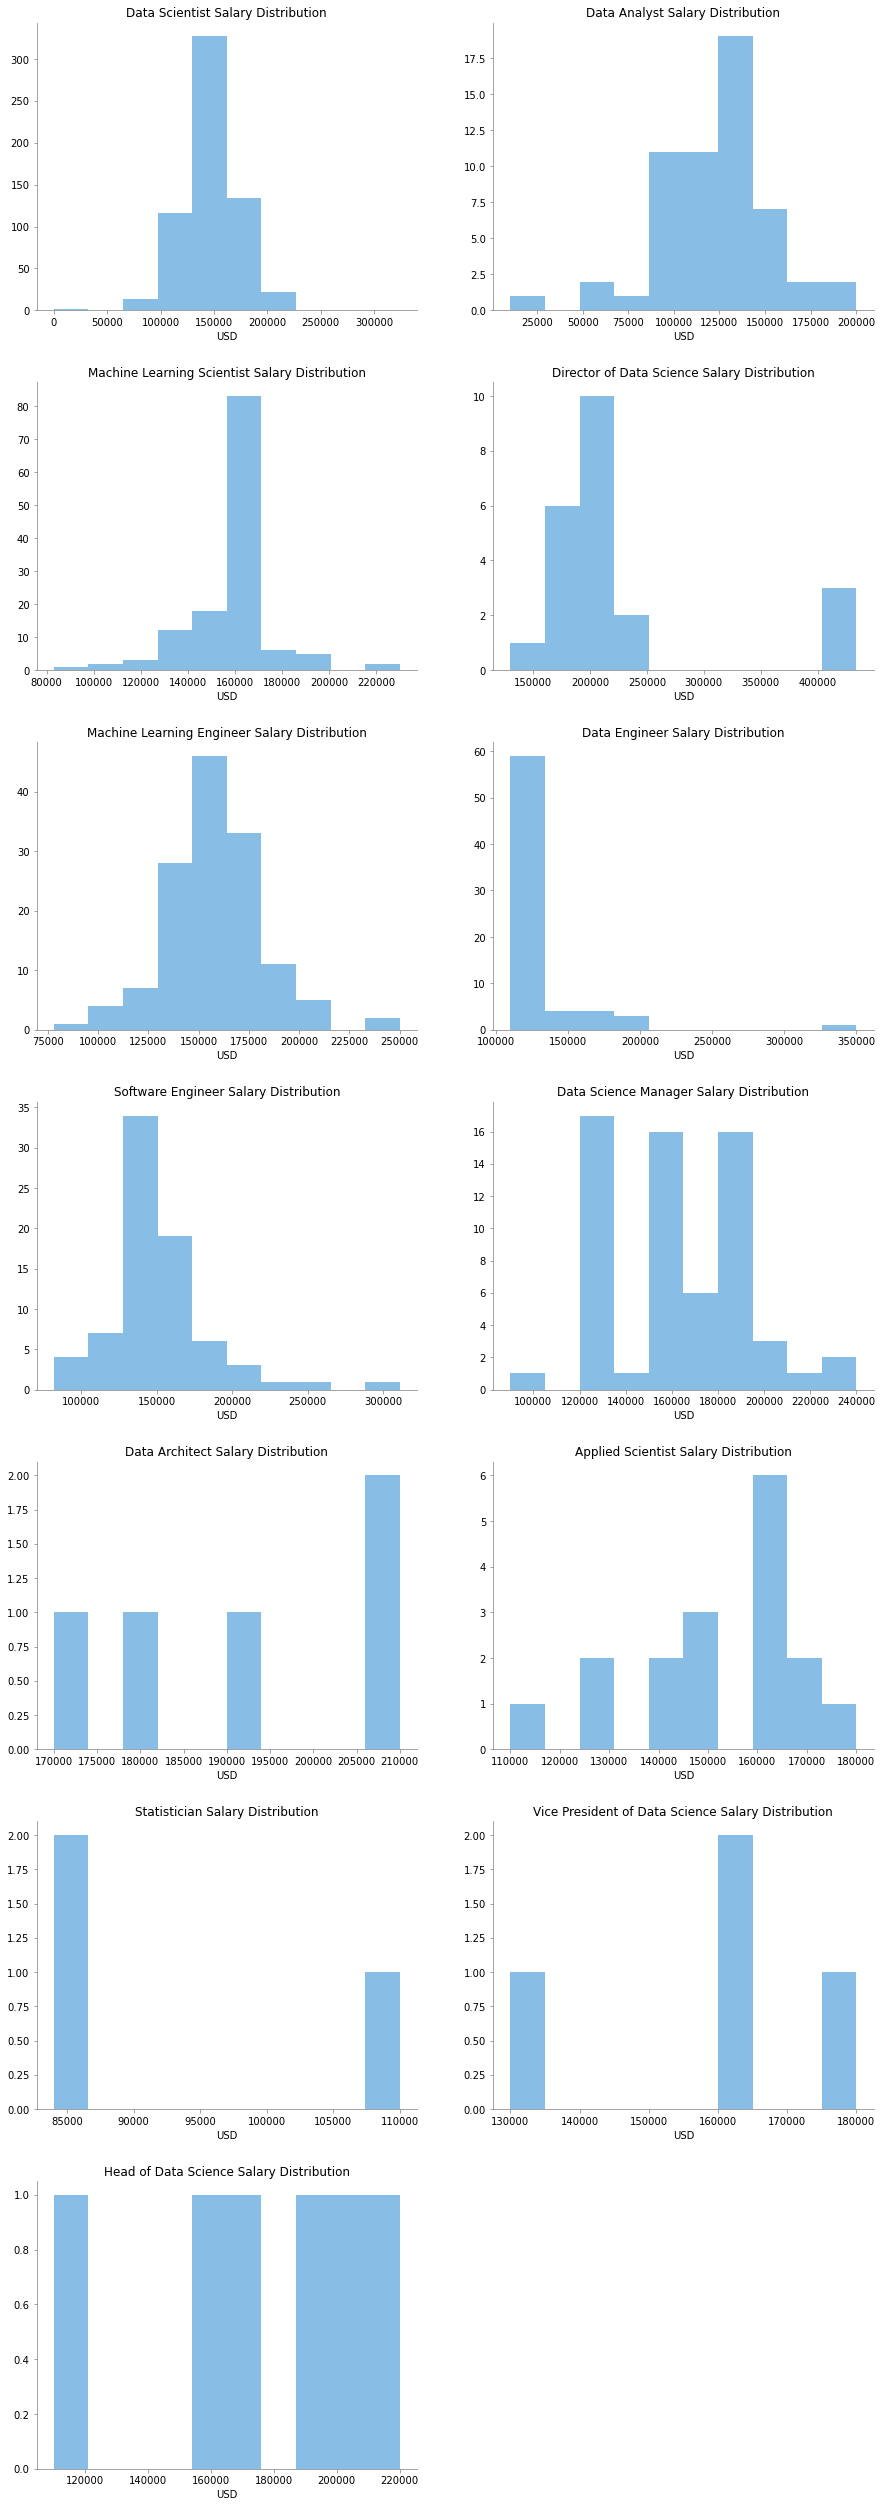

In [53]:
fig, ax = plt.subplots(7,2, figsize=(15,45))
plt.subplots_adjust(hspace = .25)

for i in range(len(df_1.Title.unique())):
    
    job_title = df_1.Title.unique()[i]
    ax[math.floor(i/2), i%2].hist(df_1[df_1.Title == job_title]['Salary'], color = light[1])
    ax[math.floor(i/2), i%2].set_title('{} Salary Distribution'.format(job_title))
    ax[math.floor(i/2), i%2].set_xlabel('USD')
    ax[math.floor(i/2), i%2].spines["bottom"].set_color(light[0])
    ax[math.floor(i/2), i%2].spines["left"].set_color(light[0])
    ax[math.floor(i/2), i%2].xaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].title.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])

    
fig.delaxes(ax[6][1])

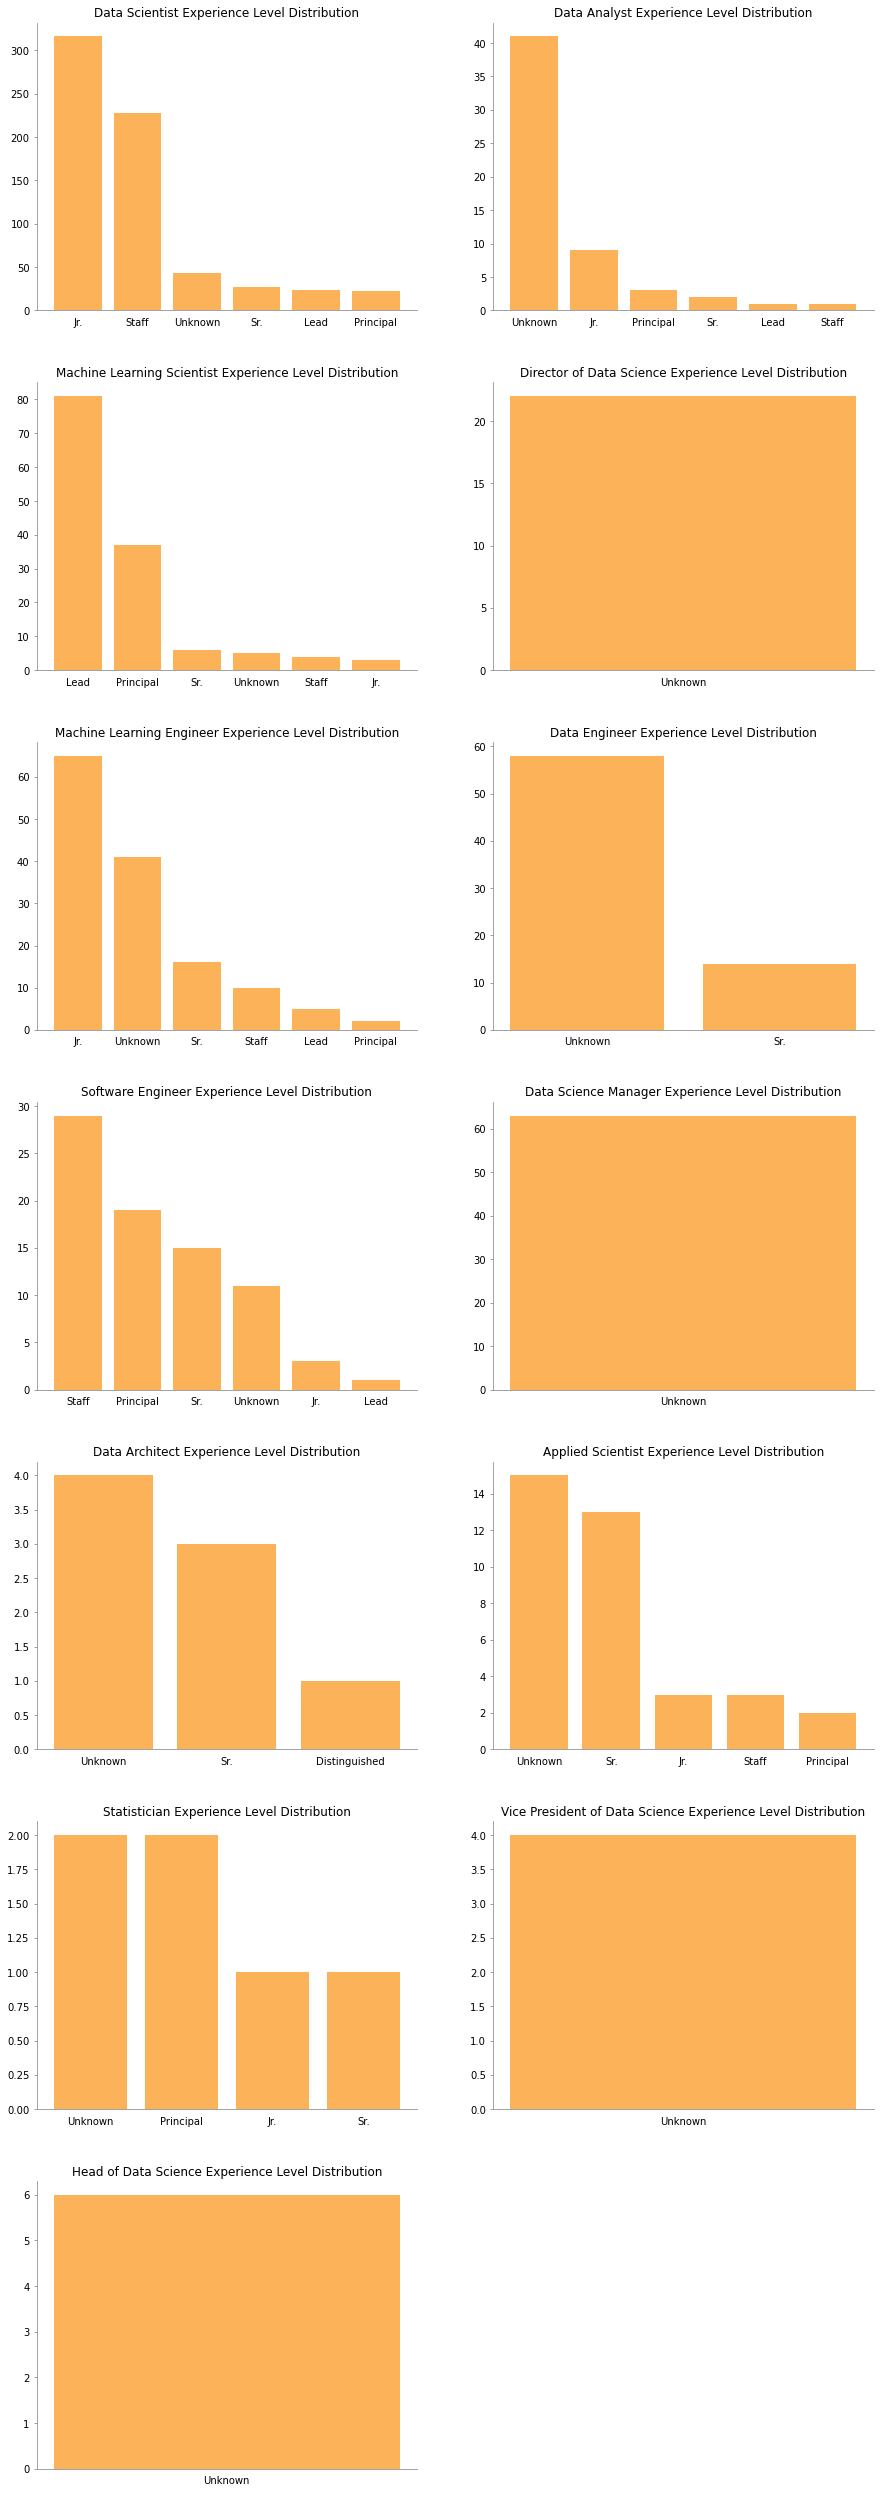

In [54]:
fig, ax = plt.subplots(7,2, figsize=(15,45))
plt.subplots_adjust(hspace = .25)


for i in range(len(df_1.Title.unique())):
    
    job_title = df_1.Title.unique()[i]
    ax[math.floor(i/2), i%2].bar(x = df_1[df_1.Title == job_title]['Levels'].unique(),
                                 height = df_1[df_1.Title == job_title]['Levels'].value_counts().values,
                                 color = light[2])
    ax[math.floor(i/2), i%2].set_title('{} Experience Level Distribution'.format(job_title))
    ax[math.floor(i/2), i%2].spines["bottom"].set_color(light[0])
    ax[math.floor(i/2), i%2].spines["left"].set_color(light[0])
    ax[math.floor(i/2), i%2].xaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].title.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].xaxis.set_ticks_position('none') 
    
fig.delaxes(ax[6][1])

In [55]:
sorted_index_descent = df_1.groupby(['Title']).median().sort_values(by= 'Salary',ascending=False).index

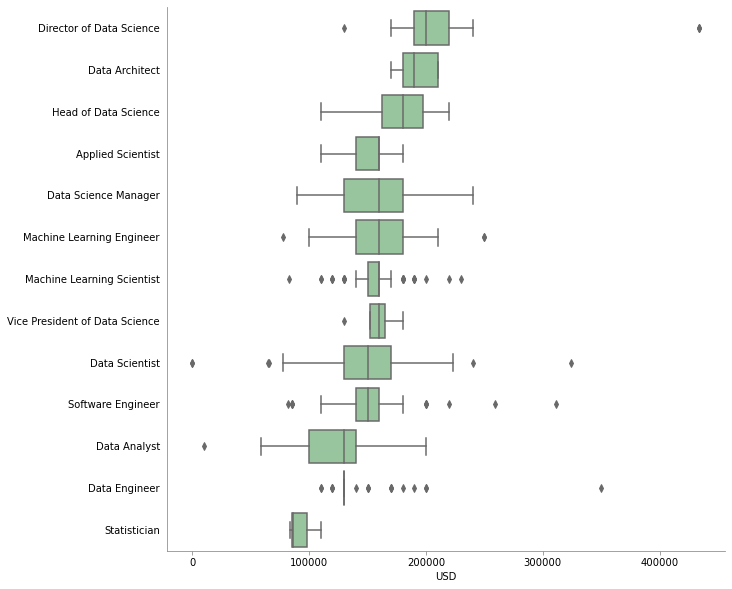

In [56]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(y = df_1['Title'], x = df_1['Salary'], order = sorted_index_descent, color = light[3])
ax.set_ylabel('')
ax.set_xlabel('USD')

ax.spines["bottom"].set_color(light[0])
ax.spines["left"].set_color(light[0])
ax.xaxis.label.set_color(dark_bright[0])
ax.yaxis.label.set_color(dark_bright[0])
ax.title.set_color(dark_bright[0])
ax.tick_params(axis='x', colors = light[0], labelcolor=dark_bright[0])
ax.tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
ax.yaxis.set_ticks_position('none') 

plt.show()

In [57]:
sorted_index_descent = df_1.groupby(['Levels']).median().sort_values(by= 'Salary',ascending=False).index

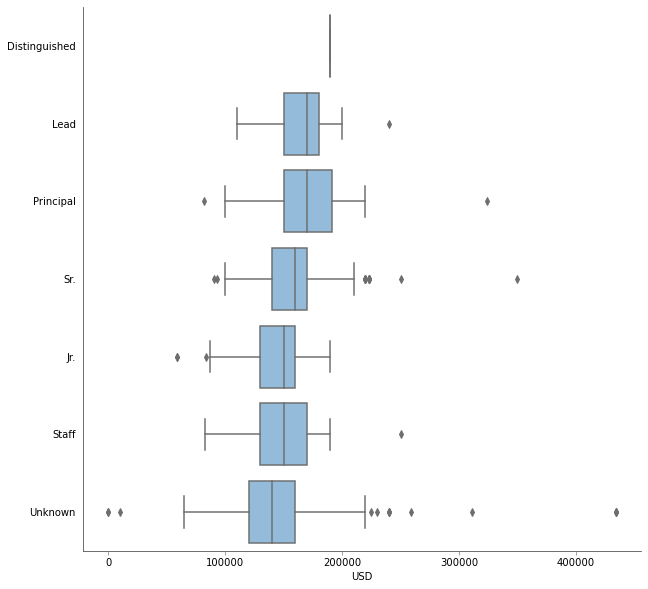

In [18]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(y=df_1['Levels'], x=df_1['Salary'], order=sorted_index_descent, color = light[1])
ax.set_ylabel('')
ax.set_xlabel('USD')

ax.spines["bottom"].set_color(light[0])
ax.spines["left"].set_color(light[0])
ax.xaxis.label.set_color(dark_bright[0])
ax.yaxis.label.set_color(dark_bright[0])
ax.title.set_color(dark_bright[0])
ax.tick_params(axis='x', colors = light[0], labelcolor=dark_bright[0])
ax.tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
ax.yaxis.set_ticks_position('none') 

plt.show()

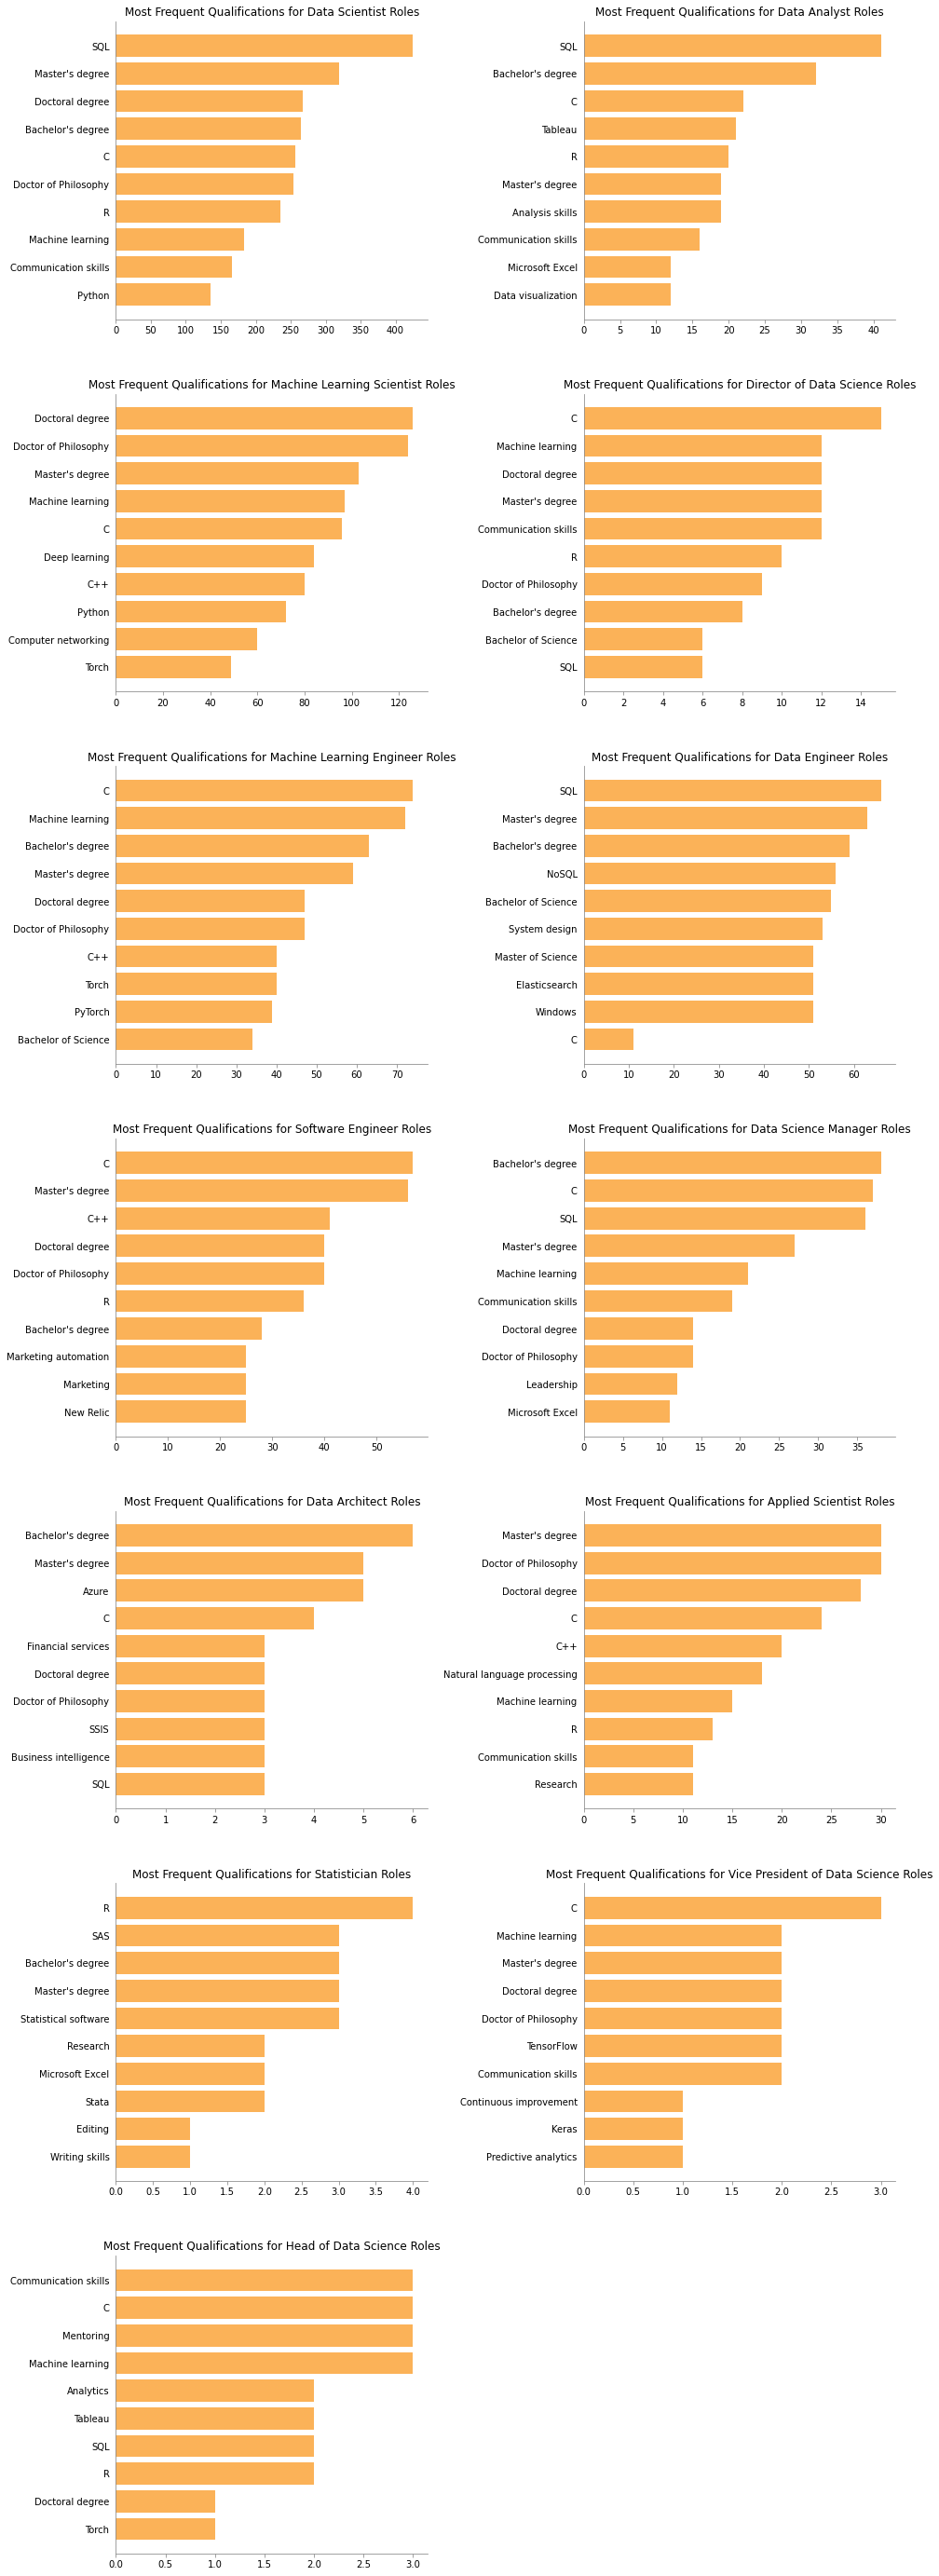

In [19]:
fig, ax = plt.subplots(7,2, figsize=(15,50))
plt.subplots_adjust(hspace = 0.25, wspace = 0.5)

for i in range(len(df_1.Title.unique())):
    
    job_title = df_1.Title.unique()[i]
    qual_index = np.flip(df_2.loc[df_1[df_1.Title == job_title].index, :].sum(axis=0).sort_values(ascending=False).index[0:10])
    qual_counts = np.flip(df_2.loc[df_1[df_1.Title == job_title].index, :].sum(axis=0).sort_values(ascending=False).values[0:10])
    
    ax[math.floor(i/2), i%2].barh(width = qual_counts,
                                 y = qual_index,
                                 color = light[2])
    ax[math.floor(i/2), i%2].set_title('Most Frequent Qualifications for {} Roles'.format(job_title))
    
    ax[math.floor(i/2), i%2].spines["bottom"].set_color(light[0])
    ax[math.floor(i/2), i%2].spines["left"].set_color(light[0])
    ax[math.floor(i/2), i%2].xaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].title.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.set_ticks_position('none') 
    
    
fig.delaxes(ax[6][1])

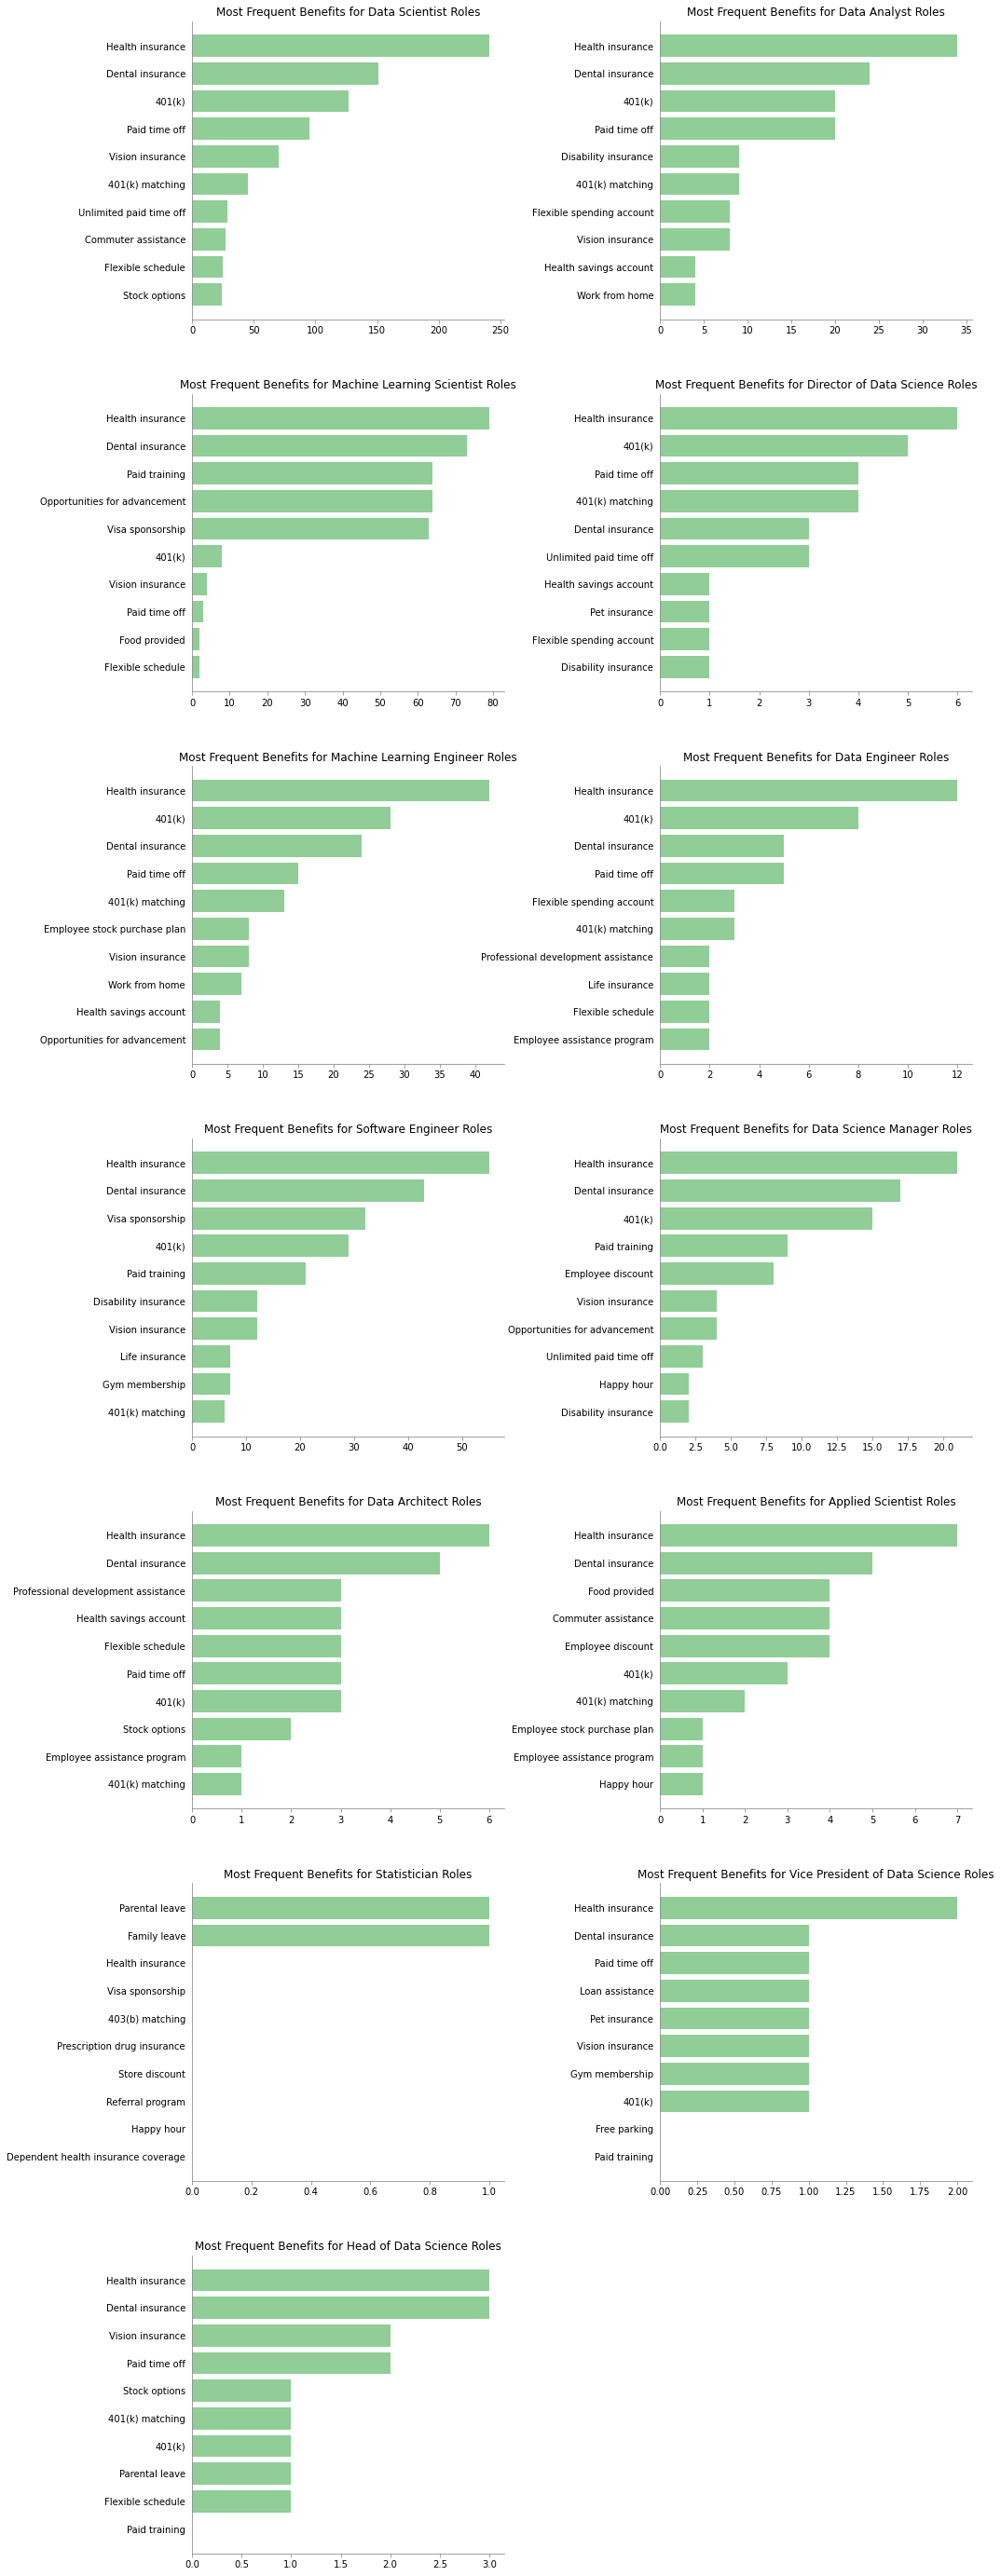

In [20]:
fig, ax = plt.subplots(7,2, figsize=(15,50))
plt.subplots_adjust(hspace = 0.25, wspace = 0.5)

for i in range(len(df_1.Title.unique())):
    
    job_title = df_1.Title.unique()[i]
    qual_index = np.flip(df_3.loc[df_1[df_1.Title == job_title].index, :].sum(axis=0).sort_values(ascending=False).index[0:10])
    qual_counts = np.flip(df_3.loc[df_1[df_1.Title == job_title].index, :].sum(axis=0).sort_values(ascending=False).values[0:10])
    
    ax[math.floor(i/2), i%2].barh(width = qual_counts,
                                 y = qual_index,
                                 color = light[3])
    ax[math.floor(i/2), i%2].set_title('Most Frequent Benefits for {} Roles'.format(job_title))
    
    ax[math.floor(i/2), i%2].spines["bottom"].set_color(light[0])
    ax[math.floor(i/2), i%2].spines["left"].set_color(light[0])
    ax[math.floor(i/2), i%2].xaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].title.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.set_ticks_position('none') 
    
    
fig.delaxes(ax[6][1])


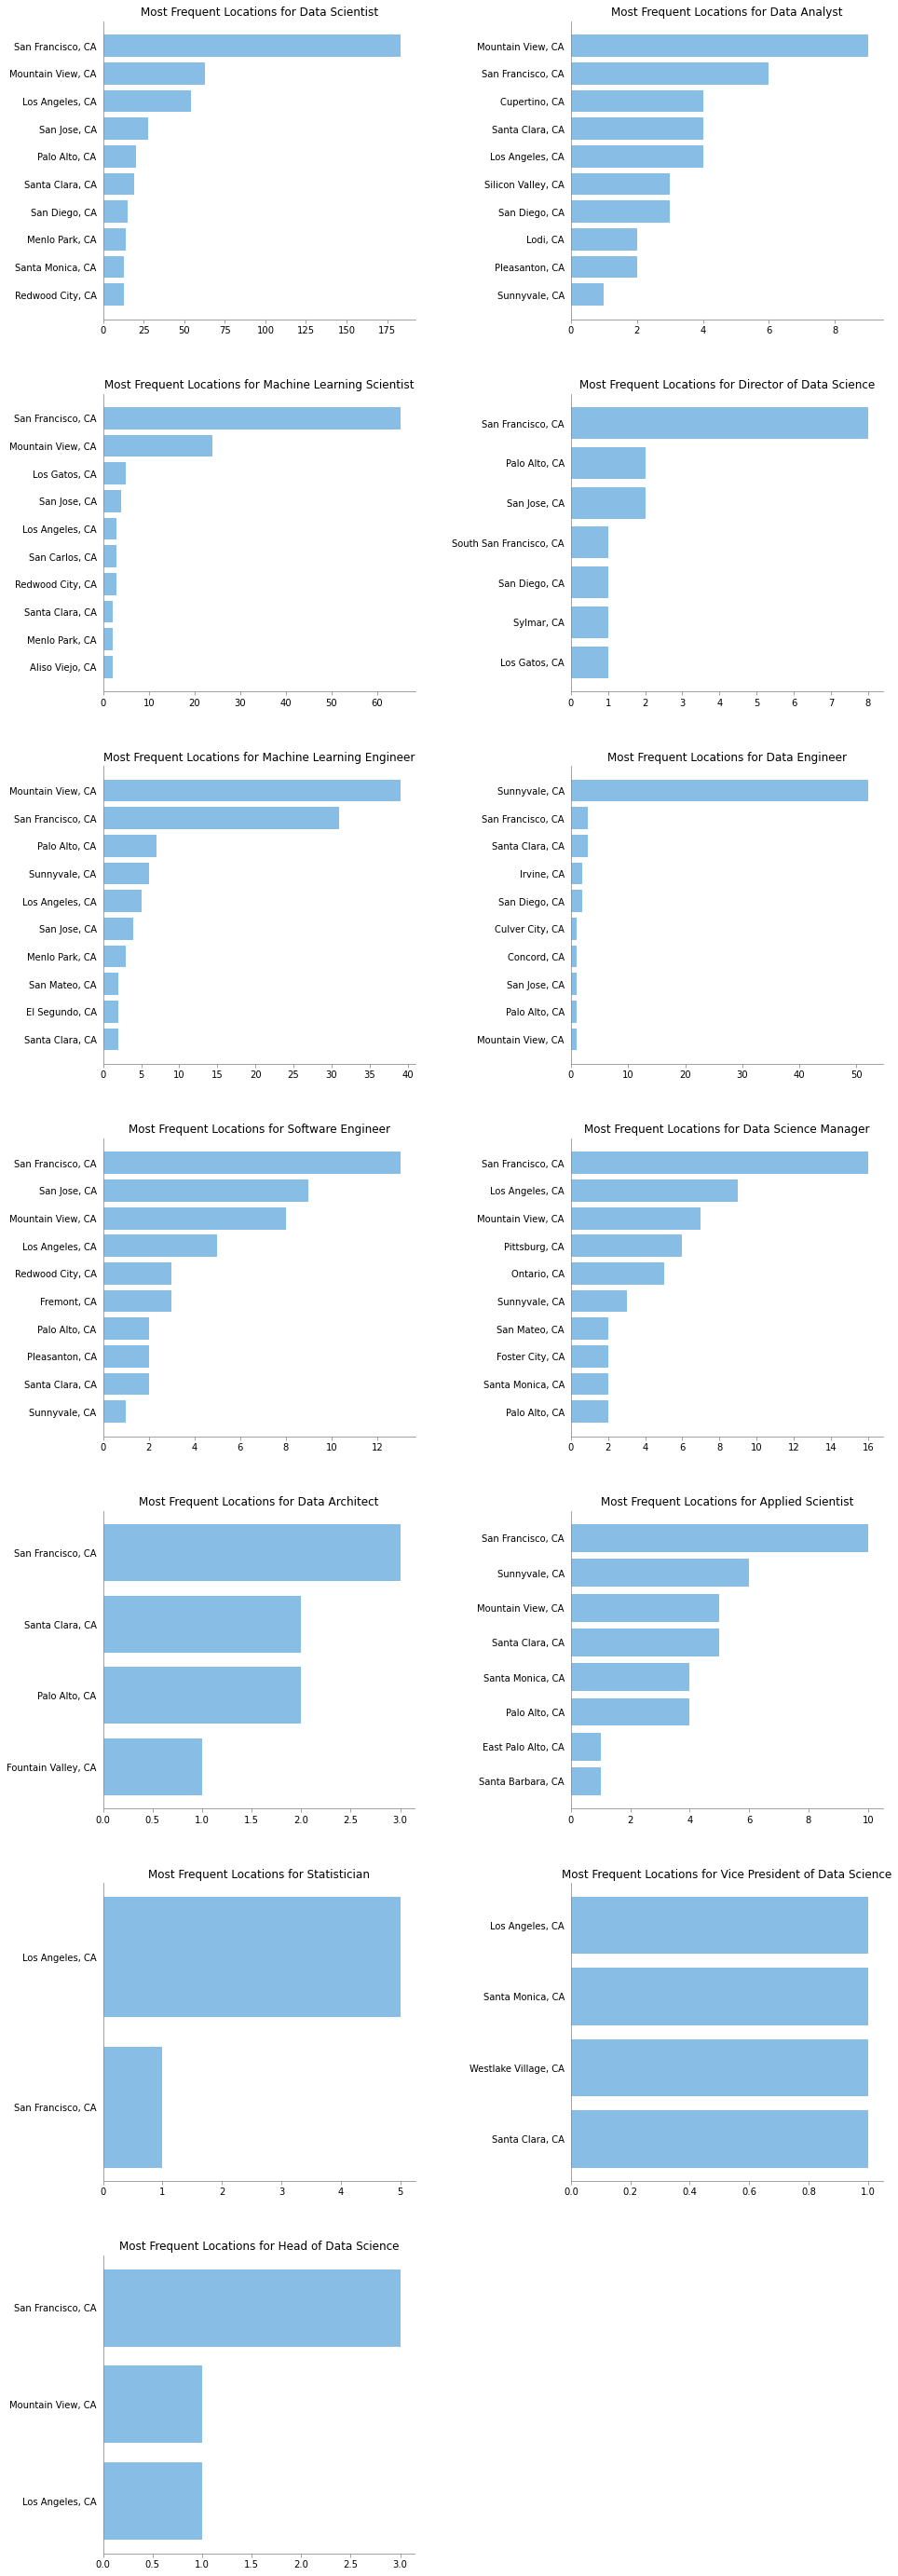

In [21]:
fig, ax = plt.subplots(7,2, figsize=(15,50))
plt.subplots_adjust(hspace = 0.25, wspace = 0.5)


for i in range(len(df_1.Title.unique())):
    
    job_title = df_1.Title.unique()[i]
    
    loc_index = np.flip(df_1[df_1.Title == job_title]['Location'].value_counts().sort_values(ascending=False).index[0:10])
    loc_counts = np.flip(df_1[df_1.Title == job_title]['Location'].value_counts().sort_values(ascending=False).values[0:10])
    
    ax[math.floor(i/2), i%2].barh(y = loc_index,
                                 width = loc_counts,
                                 color = light[1])
    ax[math.floor(i/2), i%2].set_title('Most Frequent Locations for {}'.format(job_title))
    
    ax[math.floor(i/2), i%2].spines["bottom"].set_color(light[0])
    ax[math.floor(i/2), i%2].spines["left"].set_color(light[0])
    ax[math.floor(i/2), i%2].xaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].title.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.set_ticks_position('none') 
    
fig.delaxes(ax[6][1])

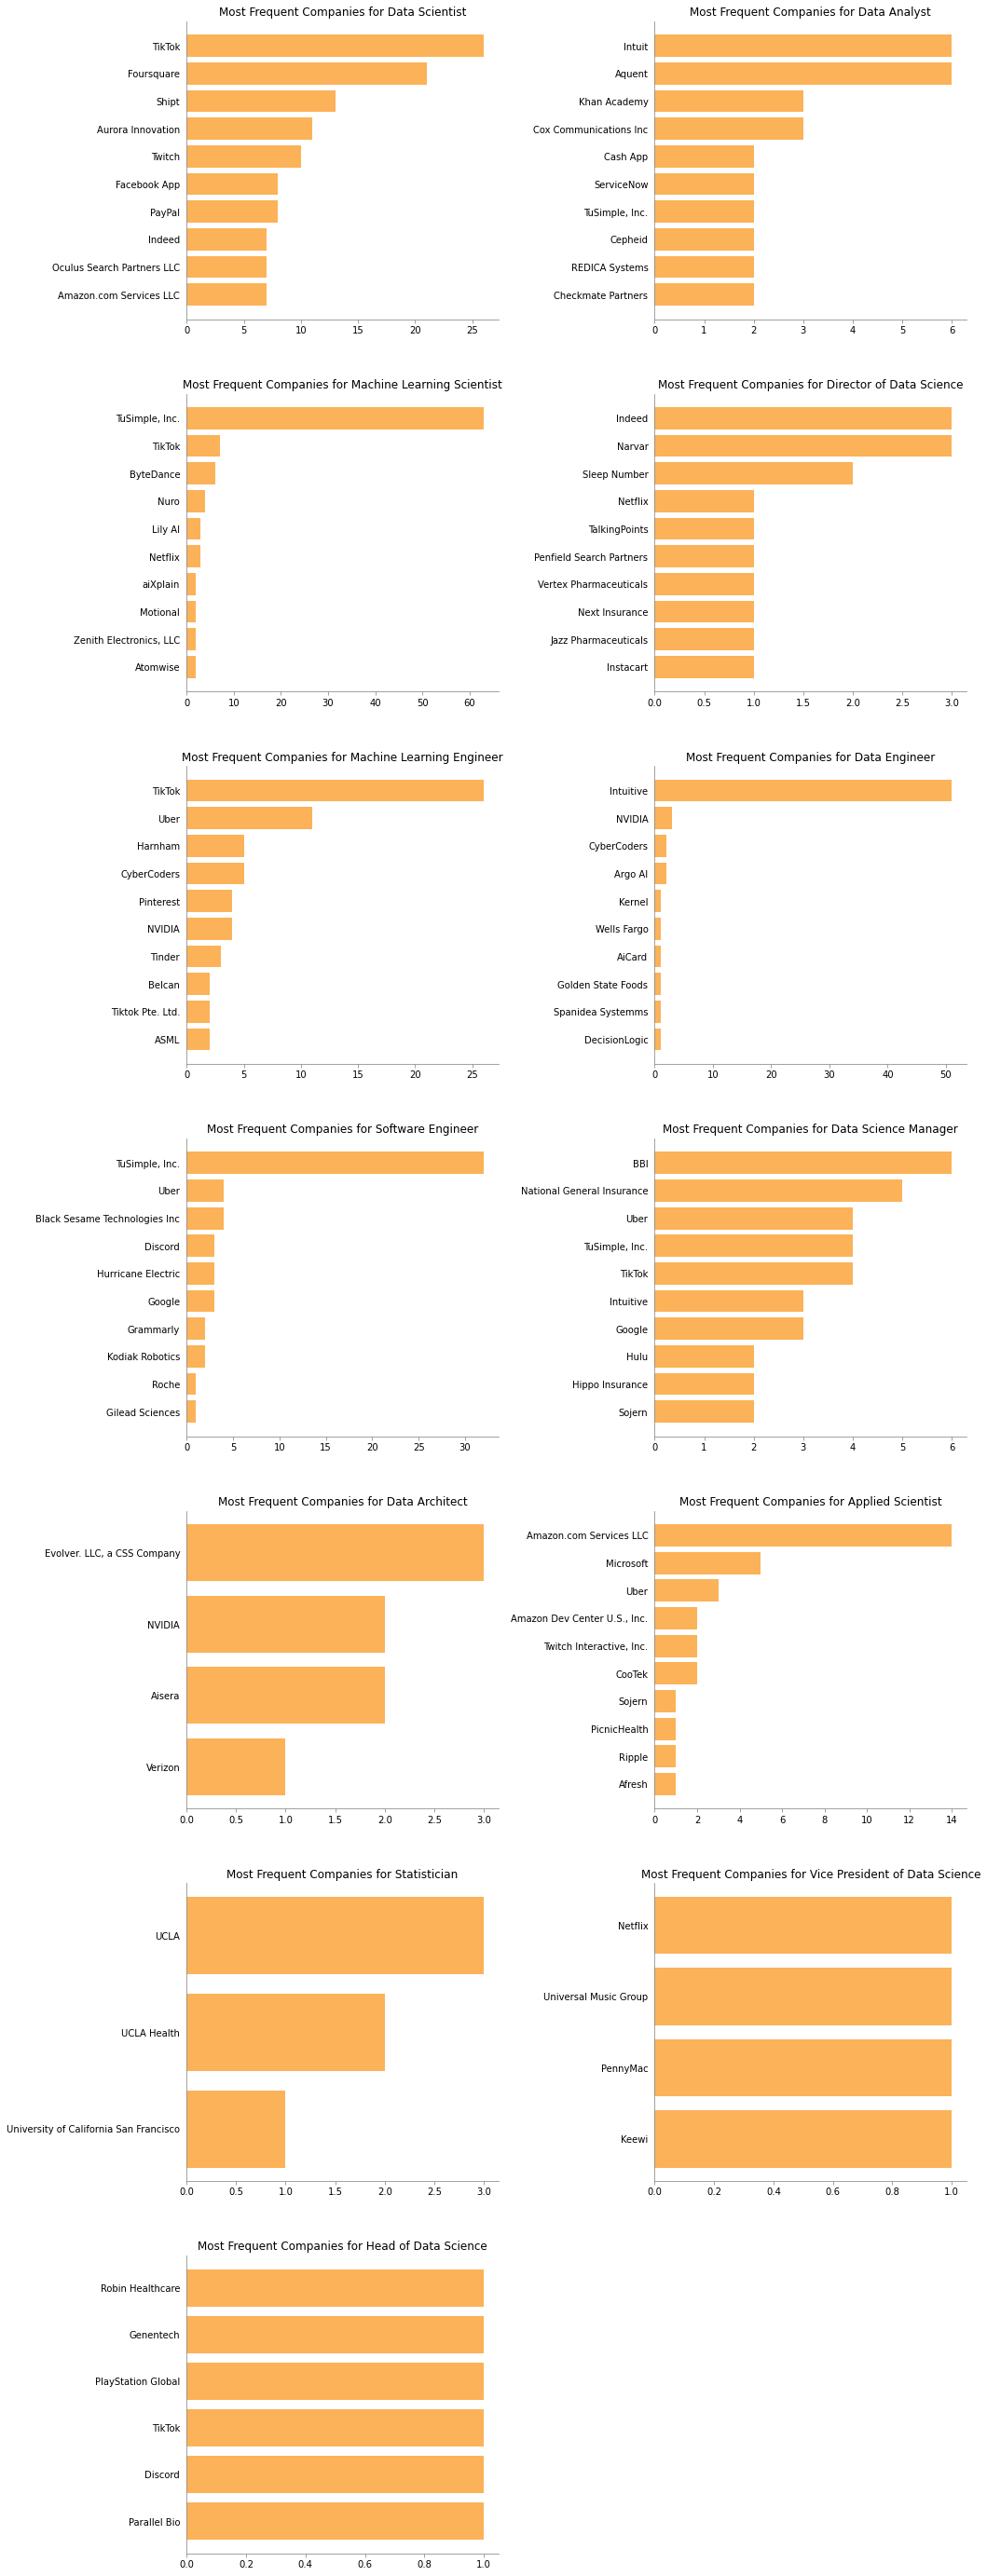

In [22]:
fig, ax = plt.subplots(7,2, figsize=(15,50))
plt.subplots_adjust(hspace = 0.25, wspace = 0.5)


for i in range(len(df_1.Title.unique())):
    
    job_title = df_1.Title.unique()[i]
    
    comp_index = np.flip(df_1[df_1.Title == job_title]['Company'].value_counts().sort_values(ascending=False).index[0:10])
    comp_counts = np.flip(df_1[df_1.Title == job_title]['Company'].value_counts().sort_values(ascending=False).values[0:10])
    
    ax[math.floor(i/2), i%2].barh(y = comp_index,
                                 width = comp_counts,
                                 color = light[2])
    ax[math.floor(i/2), i%2].set_title('Most Frequent Companies for {}'.format(job_title))
    
    ax[math.floor(i/2), i%2].spines["bottom"].set_color(light[0])
    ax[math.floor(i/2), i%2].spines["left"].set_color(light[0])
    ax[math.floor(i/2), i%2].xaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.label.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].title.set_color(dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
    ax[math.floor(i/2), i%2].yaxis.set_ticks_position('none') 
    
fig.delaxes(ax[6][1])

# 6. Load data for OLS analysis

In [23]:
#CSVs from data_cleaning.py
df_modeling_drop_first = pd.read_csv('data_cleaning/df_modeling_drop_first.csv')
dropped_columns = pd.read_csv('data_cleaning/dropped_columns.csv')

In [24]:
df_modeling_drop_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Columns: 988 entries, Unnamed: 0 to Levels_Unknown
dtypes: float64(363), int64(625)
memory usage: 9.7 MB


In [25]:
df_modeling_drop_first.head()

,Unnamed: 0,Salary,Analysis skills,Communication skills,Research,R,Machine learning,Bachelor's degree,Master's degree,Doctoral degree,...,"Location_West Hollywood, CA","Location_West Sacramento, CA","Location_Westlake Village, CA","Location_Woodland Hills, CA",Levels_Jr.,Levels_Lead,Levels_Principal,Levels_Sr.,Levels_Staff,Levels_Unknown
0,0,110000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
1,1,120000.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2,150000.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,3,150000.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,4,130000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
dropped_columns

,Unnamed: 0,0
0,0,Company_23andMe
1,1,Title_Applied Scientist
2,2,Levels_Distinguished
3,3,"Location_Alameda, CA"


# 7. OLS data cleaning

In [27]:
df_modeling_drop_first = df_modeling_drop_first.drop('Unnamed: 0', axis=1)
dropped_columns = dropped_columns.drop('Unnamed: 0', axis=1)

In [28]:
for i in df_modeling_drop_first.columns[1:]:
    df_modeling_drop_first.loc[:,i] = df_modeling_drop_first.loc[:,i].astype('Int64')

In [29]:
X_drop_first = df_modeling_drop_first.copy()
y = X_drop_first.pop('Salary')

In [30]:
X_drop_first.shape

(1287, 986)

# 8. OLS analysis

Ordinary least squares (OLS) regression fits a hyperplane to the data of the form:

$$y = X\beta + \epsilon$$

where $X$ is an $n \times p$ matrix ($n$ is the number of rows and $p$ is the number of predictors), and $\epsilon$ is the irreducible error.

The objective of OLS is to estimate the coefficients, $\beta$, which can be used to estimate $y$. The estimated $\beta$ is determined by minimizing:

$$ \sum_i^{n}{(y_{i} - \hat{y_{i}})^{2}} $$

where $\hat{y} = X\hat{\beta}$.

With 986 predictors, using an $\alpha$ of 0.05 will result in about 49 Type I errors. Therefore, use a multiple testing technique to determine a more conservative value to reduce the number of Type I errors (at the expense of making more Type II errors).

In [31]:
X_sm = sm.add_constant(X_drop_first)
model = sm.OLS(y.astype(float),X_sm.astype(int))
results = model.fit()
results.summary()

C:\Users\malex\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     14.44
Date:                Tue, 28 Dec 2021   Prob (F-statistic):          1.63e-161
Time:                        19:09:23   Log-Likelihood:                -13127.
No. Observations:                1287   AIC:                         2.787e+04
Df Residuals:                     480   BIC:                         3.203e+04
Df Model:                         806                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                             1.721e+05   2.59e+04      6.650      0.000    1.21e+05    2.23e+05
Analysis skills                                                   1568.1528   3150.382      0.498      0.619   -4622.092    7758.397
Communication skills                                              1687.3015   4193.280      0.402      0.688   -6552.152    9926.755
Research                                                         -7264.7381   4040.328     -1.798      0.073   -1.52e+04     674.177
R                                                                -1115.9204   2956.543     -0.377      0.706   -6925.286    4693.445
Machine learning                                                 -1701.4333   2942.585     -0.578      0.563   -7483.372    4080.506
Bachelor's degree                                                -4203.0410   2530.474     -1.661      0.097   -9175.217     769.135
Master's degree                                                   5423.6759   2445.846      2.218      0.027     617.788    1.02e+04
Doctoral degree                                                  -1.154e+04   6766.282     -1.706      0.089   -2.48e+04    1752.196
Doctor of Philosophy                                              2.452e+04   7368.802      3.327      0.001       1e+04     3.9e+04
Power BI                                                          3147.2365   6989.562      0.450      0.653   -1.06e+04    1.69e+04
Relational databases                                             -1.093e+04   6961.624     -1.570      0.117   -2.46e+04    2750.452
Manufacturing                                                     4663.0619   8290.597      0.562      0.574   -1.16e+04     2.1e+04
Microsoft Excel                                                  -8833.6073   6155.664     -1.435      0.152   -2.09e+04    3261.770
Molecular biology                                                -4.811e+04   2.37e+04     -2.032      0.043   -9.46e+04   -1585.793
Product management                                               -1376.1135   5101.609     -0.270      0.787   -1.14e+04    8648.133
Usability                                                        -2.876e+04   1.74e+04     -1.656      0.098   -6.29e+04    5356.171
Natural language processing                                      -5739.1037   3278.657     -1.750      0.081   -1.22e+04     703.191
Python                                                            2326.1333   2833.827      0.821      0.412   -3242.106    7894.373
SQL                                                              -4983.2880   3546.286     -1.405      0.161    -1.2e+04    1984.874
ICD coding              

## Assessing the model

The model is assessed using the F-statistic and its corresponding p-value. The F-statistic here is 14.44 and the p-value is 1.63e-161 which is basically zero. This means the model explains some relationship between the predictors and salary such that the relationship is statistically significant.

Next, the $R^{2}$ metric shows that 96% of the variation is explained by the model. However, since there are 986 predictors, a better metric is the $adj. R^{2}$ since $R^{2}$ increases with the number of predictors and $adj. R^{2}$ penalizes additional predictors. The $R^{2}$ metric is given by:

$$R^{2} = \frac{\sum_{i}^{n}(\hat{y}_{i}-\bar{y})}{\sum_{i}^{n}(y_{i}-\bar{y})} = 1 - \frac{RSS}{TSS}$$

where $\bar{y}$ is the mean of the response variable, $RSS$ is the residual sum of squares, and $TSS$ is the total sum of squares.

The $adj. R^{2}$ metric is given by:

$$adj. R^{2} = 1 - \frac{(1-R^{2})(n-1)}{n-p-1}$$



The $adj. R^{2}$ metric shows that 89.4% of the variation is explained by this model.

## Bonferroni correction

Due to the large number of predictors, a family-wise error rate (FWER) correction is used. The Bonferroni method is used due to it's simplicity and ease of use. It sets the threshold for rejecting each hypothesis test to $\alpha/p$ where $\alpha$ is 0.05 and $p$ is 986. Therefore, the probability of making a Type I error is $\leq 0.05/986 = 5.07\times 10^{-5}$.

With 986 predictors, the number of Type I errors that are expected is 0.05 (i.e., $5.07\times 10^{-5} \times 985$).

In [32]:
p_set = results.pvalues.values[1:]

reject, p_corrected, alphac_sidak, alphac_bonf = multipletests(pvals=p_set,
                                                               method='bonferroni',
                                                               alpha=0.05, 
                                                               is_sorted=False,
                                                               returnsorted=False)

print('Total number of hypothesis tests:', len(p_set))
print('Number of null hypotheses rejected at alpha = 0.05 (i.e., without the Bonferroni correction):', sum(results.pvalues.values < 0.05))
print('Number of null hypotheses rejected with Bonferroni method:', sum(reject))
print('Threshold after FWER correction by Bonferroni method:', alphac_bonf)

Total number of hypothesis tests: 986
Number of null hypotheses rejected at alpha = 0.05 (i.e., without the Bonferroni correction): 372
Number of null hypotheses rejected with Bonferroni method: 46
Threshold after FWER correction by Bonferroni method: 5.070993914807303e-05


In [33]:
rejected_null = []

print('Variables with a rejected null hypothesis using Bonferroni method:')
for i in results.pvalues.index[1:][reject]:
    print(i)
    rejected_null.append(i)

Variables with a rejected null hypothesis using Bonferroni method:
Statistical analysis
Writing skills
Shell Scripting
Unit testing
Keras
Pre-employment physical examination
Adobe Photoshop
Linux
Cleaning
Docker
Ontology
Scripting
SSIS
Bank Secrecy Act
Cognos
Backbone.js
Project management methodology
Google Cloud Platform
Title_Data Architect
Title_Data Science Manager
Title_Director of Data Science
Title_Machine Learning Engineer
Title_Software Engineer
Company_AiCard
Company_BBI
Company_CalPrivate Bank
Company_Circle
Company_Convex Tech
Company_CooTek
Company_E. & J. Gallo Winery
Company_Evolver. LLC, a CSS Company
Company_Gayathri's Sandbox
Company_Grammarly
Company_Hurricane Electric
Company_Invitae
Company_LivePerson
Company_Sojern
Company_Spotline Inc
Company_TargetCW
Company_Teknatio
Company_Vivun
Company_Warman O'Brien
Company_iMerit
Location_Burlingame, CA
Location_Oakland, CA
Location_Pittsburg, CA


## Interpreting the OLS results

In [34]:
order = results.pvalues.index[1:][reject][pd.DataFrame(results.params.values[1:][reject]).sort_values(by=0, ascending=False).index]

In [35]:
#model baseline
dropped_columns

,0
0,Company_23andMe
1,Title_Applied Scientist
2,Levels_Distinguished
3,"Location_Alameda, CA"


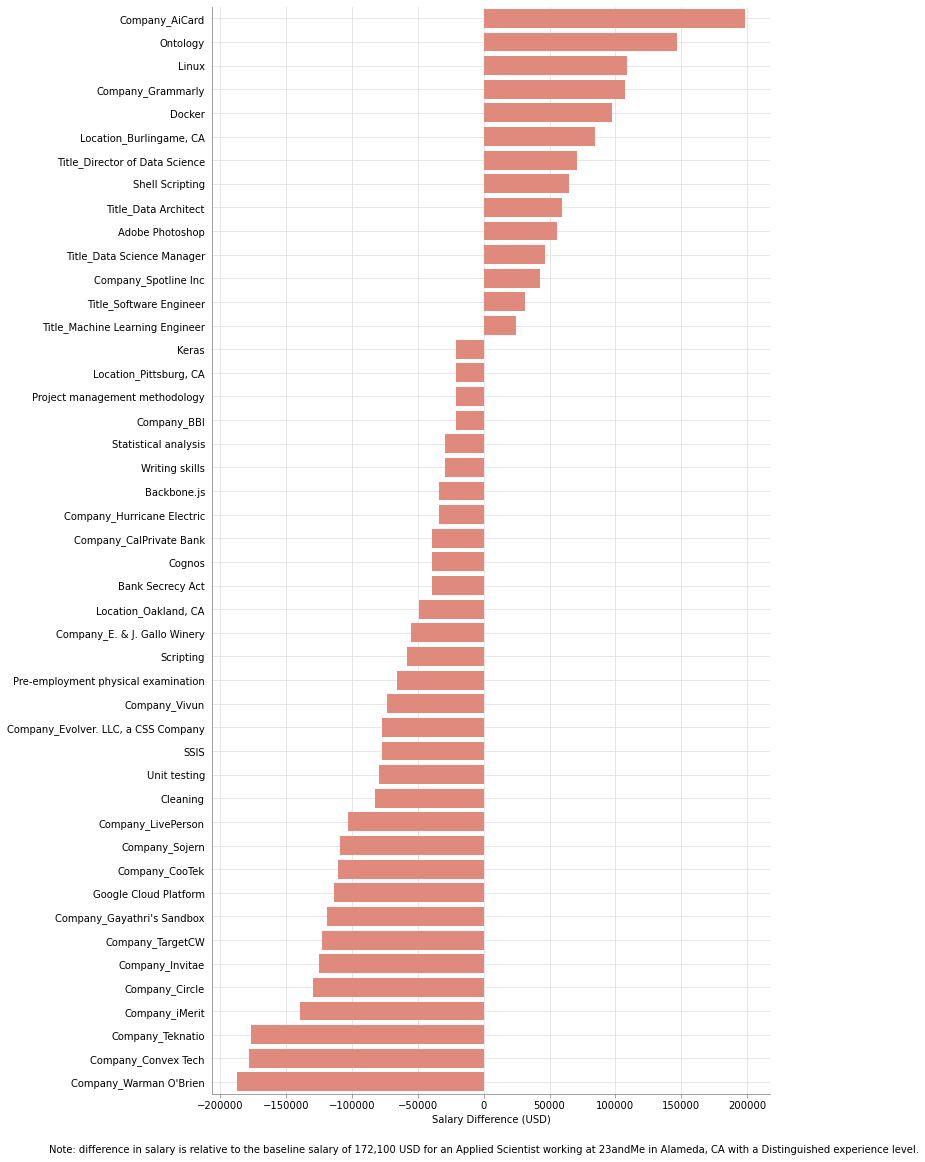

In [64]:
plt.figure(figsize=(10, 20))
ax = sns.barplot(y=results.pvalues.index[1:][reject],x=results.params.values[1:][reject], order = order, color = light[8])
ax.set_axisbelow(True)
ax.set_xlabel('Salary Difference (USD)')
txt = 'Note: difference in salary is relative to the baseline salary of 172,100 USD for an Applied Scientist working at 23andMe in Alameda, CA with a Distinguished experience level.'
ax.text(.5, 48, txt, ha='center', color = dark_bright[0])

ax.spines["bottom"].set_color(light[0])
ax.spines["left"].set_color(light[0])
ax.xaxis.label.set_color(dark_bright[0])
ax.yaxis.label.set_color(dark_bright[0])
ax.title.set_color(dark_bright[0])
ax.tick_params(axis ='x', colors = light[0], labelcolor=dark_bright[0])
ax.tick_params(axis='y', colors = light[0], labelcolor=dark_bright[0])
ax.yaxis.set_ticks_position('none')
ax.grid(color = grid[0])

plt.show()

In [37]:
company = 0
title = 0
location = 0
levels = 0
qualifications = 0
for i in results.pvalues.index[1:][reject]:
    if 'Company' in i:
        company += 1
    elif 'Title' in i:
        title += 1
    elif 'Location' in i:
        location += 1
    elif 'Levels' in i:
        levels += 1
    else:
        qualifications += 1

print('Statistically significant predictors count:')        
print('Company: {}'.format(company))
print('Qualifications: {}'.format(qualifications))
print('Title: {}'.format(title))
print('Location: {}'.format(location))
print('Experience level: {}'.format(levels))

Statistically significant predictors count:
Company: 20
Qualifications: 18
Title: 5
Location: 3
Experience level: 0


Experience level predictors do not have a p-value that indicate statistical significance in predicting salary across California, because other predictors have a larger impact (i.e., company, location, and title). For instance, a senior level data scientist position in San Bernadino, CA and a senior level data scientist position in San Francisco, CA will have a large difference in salary regardless of seniority. Therefore, experience level is not a useful predictor for predicting salary across all of California.

Below is an OLS analysis using only the experience level predictor. Only 6.5% of the variation in salary is explained by the experience level predictor (according to $R^{2}$).

In [38]:
levels_var = []
for i in X_drop_first.columns:
    if "Levels" in i:
        levels_var.append(i)

In [39]:
X_sm = sm.add_constant(X_drop_first[levels_var])
model = sm.OLS(y.astype(float),X_sm.astype(int))
results_2 = model.fit()
results_2.summary()

C:\Users\malex\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     14.91
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           1.55e-16
Time:                        19:09:25   Log-Likelihood:                -15161.
No. Observations:                1287   AIC:                         3.034e+04
Df Residuals:                    1280   BIC:                         3.037e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               1.9e+05   3.17e+04      5.995      0.000    1.28e+05    2.52e+05
Levels_Jr.       -5.011e+04   3.19e+04     -1.570      0.117   -1.13e+05    1.25e+04
Levels_Lead      -2.618e+04   3.22e+04     -0.814      0.416   -8.93e+04    3.69e+04
Levels_Principal  -2.27e+04   3.21e+04     -0.708      0.479   -8.56e+04    4.02e+04
Levels_Sr.       -3.167e+04   3.17e+04     -0.998      0.318   -9.39e+04    3.06e+04
Levels_Staff     -3.919e+04   3.19e+04     -1.229      0.219   -1.02e+05    2.34e+04
Levels_Unknown   -4.706e+04   3.17e+04     -1.484      0.138   -1.09e+05    1.52e+04
==============================================================================
Omnibus:                      736.920   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19814.265
Skew:                           2.132   Prob(JB):                         0.00
Kurtosis:                      21.743   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The boxplots (from the first part of the EDA) indicate there is less overlap in salary across job titles than across experience level. Hence, why title appears as a statistically significant predictor and experience level does not.

## Collinearity among predictors

Next, perform $\chi^{2}$ tests to determine collinearity among variables. An explanation of contingency table creation and $\chi^{2}$ is given in the diagram below.

![alt text](images/chi-square-test.jpg "Chi-square test")

In [40]:
#perform chi-square tests between every variable except salary
for i in range(len(df_1.columns)-1):
    for j in range(len(df_1.columns)-1-i):
        if df_1.columns[i] == 'Salary' or df_1.columns[j+i+1] == 'Salary':
            pass
        else:
            contingency = pd.crosstab(df_1[df_1.columns[i]], df_1[df_1.columns[j+i+1]])
            stat, p, dof, expected = chi2_contingency(contingency)

            alpha = 0.05
            print('{} and {}:'.format(df_1.columns[i], df_1.columns[j+i+1]))
            print("p-value = " + str(p))
            if p <= alpha:
                print('Variables are dependent (reject H0)\n')
            else:
                print('Variables are independent (H0 holds true)\n')
    

Title and Company:
p-value = 4.1871062576112276e-126
Variables are dependent (reject H0)

Title and Location:
p-value = 3.313275575434028e-59
Variables are dependent (reject H0)

Title and Levels:
p-value = 2.906697386608136e-82
Variables are dependent (reject H0)

Company and Location:
p-value = 0.0
Variables are dependent (reject H0)

Company and Levels:
p-value = 0.013575918831914615
Variables are dependent (reject H0)

Location and Levels:
p-value = 0.0001587483525958263
Variables are dependent (reject H0)



With an $\alpha$ of 0.05, all null hypotheses are rejected (where the null hypotheses are that the variables do not depend on each other).

Therefore, collinearity exists between every variable, so the OLS model is potentially less reliable for inferential purposes.